In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df_train = pd.read_csv('train.csv')

In [39]:
df_train

,volume_kg,distribution_channel,customer,brand,channel,store_format,category,year,month
0,460.026585,0,1,1,FOOD SERVICE,3,3,2010,1
1,456.944328,0,1,1,FOOD SERVICE,3,3,2010,2
2,926.790243,0,1,1,FOOD SERVICE,3,3,2010,3
3,762.549167,0,1,1,FOOD SERVICE,3,3,2010,4
4,1132.060704,0,1,1,FOOD SERVICE,3,3,2010,5
...,...,...,...,...,...,...,...,...,...
5788,938.077344,1,15,1,DISCOUNTS,1,10,2019,12
5789,464.815891,1,15,1,DISCOUNTS,1,10,2020,1
5790,471.421097,1,15,1,DISCOUNTS,1,10,2020,2
5791,12611.841468,1,15,1,DISCOUNTS,1,10,2020,3


In [40]:
df_train["serie_name"] = pd.concat([df_train["distribution_channel"], df_train["customer"], df_train["brand"], df_train["channel"], df_train["store_format"], df_train["category"]], axis=1).apply(lambda x: f"{x[0]}_{x[1]}_{x[2]}_{x[3]}_{x[4]}_{x[5]}", axis=1)
df_train

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_10408\176964499.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_train["serie_name"] = pd.concat([df_train["distribution_channel"], df_train["customer"], df_train["brand"], df_train["channel"], df_train["store_format"], df_train["category"]], axis=1).apply(lambda x: f"{x[0]}_{x[1]}_{x[2]}_{x[3]}_{x[4]}_{x[5]}", axis=1)


,volume_kg,distribution_channel,customer,brand,channel,store_format,category,year,month,serie_name
0,460.026585,0,1,1,FOOD SERVICE,3,3,2010,1,0_1_1_FOOD SERVICE_3_3
1,456.944328,0,1,1,FOOD SERVICE,3,3,2010,2,0_1_1_FOOD SERVICE_3_3
2,926.790243,0,1,1,FOOD SERVICE,3,3,2010,3,0_1_1_FOOD SERVICE_3_3
3,762.549167,0,1,1,FOOD SERVICE,3,3,2010,4,0_1_1_FOOD SERVICE_3_3
4,1132.060704,0,1,1,FOOD SERVICE,3,3,2010,5,0_1_1_FOOD SERVICE_3_3
...,...,...,...,...,...,...,...,...,...,...
5788,938.077344,1,15,1,DISCOUNTS,1,10,2019,12,1_15_1_DISCOUNTS_1_10
5789,464.815891,1,15,1,DISCOUNTS,1,10,2020,1,1_15_1_DISCOUNTS_1_10
5790,471.421097,1,15,1,DISCOUNTS,1,10,2020,2,1_15_1_DISCOUNTS_1_10
5791,12611.841468,1,15,1,DISCOUNTS,1,10,2020,3,1_15_1_DISCOUNTS_1_10


In [41]:
print("Number of unique time series: ", df_train["serie_name"].nunique())

Number of unique time series:  48


Example plot of one serie

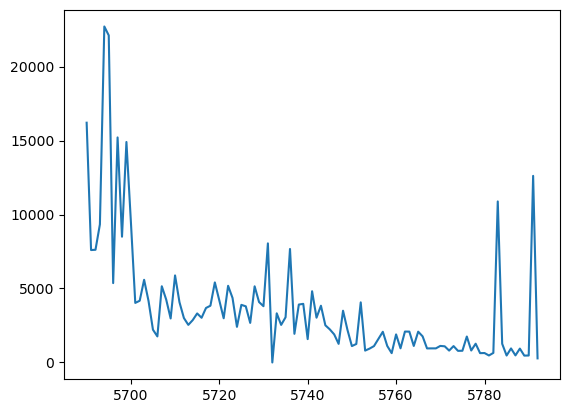

In [43]:
ts1 = df_train[df_train["serie_name"] == "1_15_1_DISCOUNTS_1_10"]
plt.plot(ts1.index, ts1["volume_kg"])